# TC Profiling Paper Analysis

Manuel Peuster (manuel.peuster@uni-paderborn.de)

In [36]:
# global settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import matplotlib.ticker as ticker
sns.set_style("ticks")
sns.set_context({"figure.figsize": (10, 5)})

In [48]:
# read results
INPUT_DF = pd.read_pickle("data/2018-03-13-tc_paper_random_synthetic_pmodels.pkl")
#print(df)

## Common Helpers

In [38]:
def _cartesian_product(p_dict):
    """
    Compute Cartesian product on parameter dict:
    In:
        {"number": [1,2,3], "color": ["orange","blue"] }
    Out:
        [ {"number": 1, "color": "orange"},
          {"number": 1, "color": "blue"},
          {"number": 2, "color": "orange"},
          {"number": 2, "color": "blue"},
          {"number": 3, "color": "orange"},
          {"number": 3, "color": "blue"}
        ]
    """
    p_names = sorted(p_dict)
    return [dict(zip(p_names, prod)) for prod in it.product(
        *(p_dict[n] for n in p_names))]

def _generate_filters(df, column_lst):
    """
    config defines arbitrary column names over which we want to iterate
    to create multiple plots, we fetch the possible values of each column
    from the dataset, and compute a float list (cartesian_product) of
    configuration combinations to be plotted
    """
    # extract possible values
    filter_dict = dict()
    for column in column_lst:
        filter_dict[column] = list(set(df[column]))
    # all combinations
    return _cartesian_product(filter_dict)

def _filter_df_by_dict(df, filter_dict):
    """
    do some Pandas magic to dynamically filter df by given dict
    filter_dict = {"column1": "value", "column2": ...}
    """
    return df.loc[
         (df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]

## Selector comparison

Filter returned 0 data entires.
Filtered plot data has 18750 entries


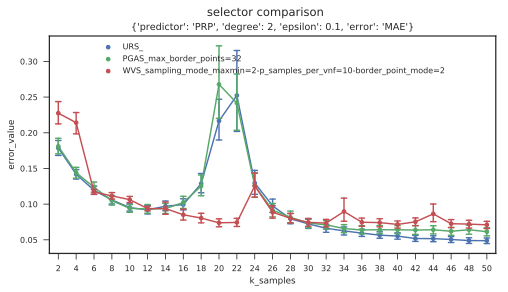

Filtered plot data has 18750 entries


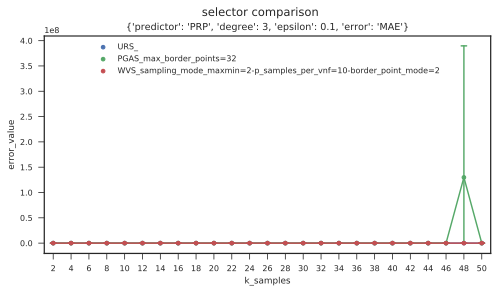

Filter returned 0 data entires.
Filtered plot data has 18750 entries


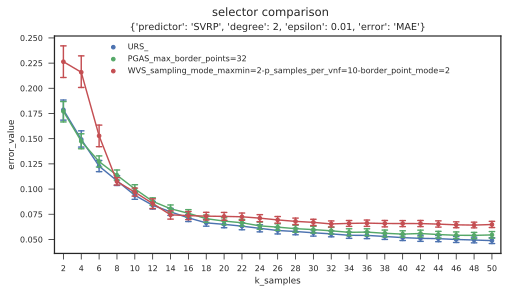

Filtered plot data has 18750 entries


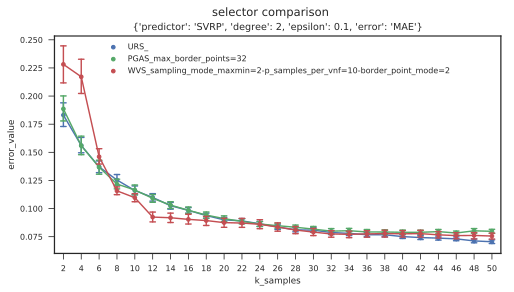

Filtered plot data has 18750 entries


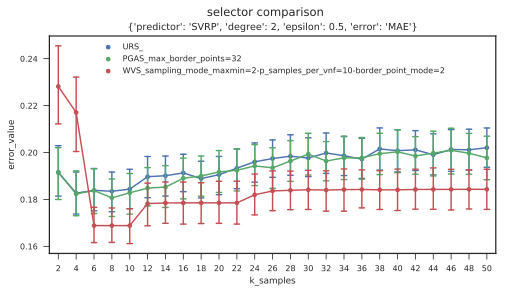

In [49]:
def selector_plot(df, filter_dict,
                  title="selector comparison",
                  x="k_samples", y="error_value",
                  hue="selector_conf", # errors are based on this grouping
                  error_bars=95, # ="sd" or =95 (for ci)
                  fig_width=8,
                  fig_height=4):
    sns.set_context("paper", rc={
                    "lines.linewidth": .8,
                    "lines.markersize": 10})
    # filters (one filter per plot)
    if isinstance(filter_dict, dict):
        filter_dict_list = [filter_dict]
    else:
        filter_dict_list = filter_dict
    # iterate over all filters to gen. diff. plots
    for f in filter_dict_list:
        # select data to be plotted
        dff = _filter_df_by_dict(df, f)
        if len(dff) < 1:
            print("Filter returned 0 data entires.")
            continue  # nothing to plot
        print("Filtered plot data has {} entries".format(len(dff)))
        fig, ax = plt.subplots(
            figsize=(fig_width,
                     fig_height),
                     dpi=300)
        # do plot
        sns.pointplot(ax=ax,
                      data=dff,
                      x=x,
                      y=y,
                      hue=hue,
                      ci=error_bars,  # ci="sd" or ci=95
                      capsize=.3)

        # create legend
        ax.legend(loc='upper center')
        fig.suptitle(title)
        ax.set_title(str(f))
        #ax.set_ylabel(self.params.get("y"))
        #ax.set_xlabel(self.params.get("x"))
        #ax.set_ylim([self.params.get("y_lim_min"),
        #             self.params.get("y_lim_max")])
        #fig.savefig(path, bbox_inches="tight")
        plt.show()
            
df = INPUT_DF.copy()
selector_plot(df, 
              {"predictor": "PRP",  # PRP / SVRP
               "degree": 1,
               "epsilon": 0.1,
               "error": "MAE"}
              )
selector_plot(df, 
              {"predictor": "PRP",  # PRP / SVRP
               "degree": 2,
               "epsilon": 0.1,
               "error": "MAE"}
              )
selector_plot(df, 
              {"predictor": "PRP",  # PRP / SVRP
               "degree": 3,
               "epsilon": 0.1,
               "error": "MAE"}
              )
selector_plot(df, 
              {"predictor": "PRP",  # PRP / SVRP
               "degree": 4,
               "epsilon": 0.1,
               "error": "MAE"}
              )
selector_plot(df, 
              {"predictor": "SVRP",  # PRP / SVRP
               "degree": 2,
               "epsilon": 0.01,
               "error": "MAE"}
              )
selector_plot(df, 
              {"predictor": "SVRP",  # PRP / SVRP
               "degree": 2,
               "epsilon": 0.1,
               "error": "MAE"}
              )
selector_plot(df, 
              {"predictor": "SVRP",  # PRP / SVRP
               "degree": 2,
               "epsilon": 0.5,
               "error": "MAE"}
              )